# 3. Covid-19 samples from healthy, mild and severe patients
Chen ST, Park MD, Del Valle DM, Buckup M, Tabachnikova A, Thompson RC, et al. A shift in lung macrophage composition is associated with COVID-19 severity and recovery. Sci Transl Med. 2022;14:eabn5168

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [3]:
covid_counts = pd.read_csv("data/covid_counts.tsv", sep='\t')
covid = convert_counts_to_df(covid_counts, column_name="celltype")

In [4]:
covid

Sample    Group Disease celltype
cell_1        HC1  Healthy       N  B cells
cell_2        HC1  Healthy       N  B cells
cell_3        HC1  Healthy       N  B cells
cell_4        HC1  Healthy       N  B cells
cell_5        HC1  Healthy       N  B cells
...           ...      ...     ...      ...
cell_65809     S2   Severe       Y      pDC
cell_65810     S2   Severe       Y      pDC
cell_65811     S2   Severe       Y      pDC
cell_65812     S4   Severe       Y      pDC
cell_65813     S6   Severe       Y      pDC

[65813 rows x 4 columns]

----------

## Run Scanpro

### Logit

In [5]:
out_covid_logit = scanpro(covid, clusters_col='celltype', 
                          conds_col='Group', samples_col='Sample')
out_covid_logit.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


baseline_props  mean_props_Healthy  mean_props_Moderate  \
clusters                                                               
B cells            0.003343            0.003503             0.012990   
Epithelial         0.053652            0.130246             0.051903   
Macrophages        0.750870            0.735290             0.512996   
Mast               0.001064            0.002337             0.002220   
NK cells           0.016425            0.008894             0.052466   
Neutrophil         0.024418            0.000000             0.001204   
Plasma             0.015818            0.000224             0.002150   
T cells            0.117241            0.094594             0.325030   
mDC                0.014860            0.023776             0.030831   
pDC                0.002310            0.001134             0.008210   

             mean_props_Severe  f_statistics      p_values  adjusted_p_values  
clusters                                                                       
B cells               0.004005      2.593405  1.030471e-01       1.472102e-01  
Epithelial            0.118455      1.536041  2.427651e-01       2.801274e-01  
Macrophages           0.604316      1.491742  2.521147e-01       2.801274e-01  
Mast                  0.001699      1.164873  3.349114e-01       3.349114e-01  
NK cells              0.017979      4.841923  2.113110e-02       7.043700e-02  
Neutrophil            0.055594     92.441438  4.690858e-10       4.690858e-09  
Plasma                0.050913     10.404122  1.043908e-03       5.219539e-03  
T cells               0.137097      3.081910  7.122534e-02       1.275975e-01  
mDC                   0.008876      2.984785  7.655851e-02       1.275975e-01  
pDC                   0.001066      4.023778  3.640763e-02       9.101907e-02

In [6]:
out_covid_logit.results.to_csv("results/covid_scanpro_rep_logit.tsv", sep="\t")

### arcsin

In [7]:
out_covid_arcsin = scanpro(covid, clusters_col='celltype', samples_col='Sample',
                           conds_col='Group', transform='arcsin')
out_covid_arcsin.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


baseline_props  mean_props_Healthy  mean_props_Moderate  \
clusters                                                               
B cells            0.003343            0.003503             0.012990   
Epithelial         0.053652            0.130246             0.051903   
Macrophages        0.750870            0.735290             0.512996   
Mast               0.001064            0.002337             0.002220   
NK cells           0.016425            0.008894             0.052466   
Neutrophil         0.024418            0.000000             0.001204   
Plasma             0.015818            0.000224             0.002150   
T cells            0.117241            0.094594             0.325030   
mDC                0.014860            0.023776             0.030831   
pDC                0.002310            0.001134             0.008210   

             mean_props_Severe  f_statistics  p_values  adjusted_p_values  
clusters                                                                   
B cells               0.004005      3.200032  0.075373           0.125621  
Epithelial            0.118455      0.310040  0.738883           0.820981  
Macrophages           0.604316      1.237913  0.323129           0.403912  
Mast                  0.001699      0.042212  0.958802           0.958802  
NK cells              0.017979      7.534890  0.007097           0.023658  
Neutrophil            0.055594      7.709304  0.006560           0.023658  
Plasma                0.050913      1.387393  0.285560           0.403912  
T cells               0.137097      5.454035  0.019765           0.049100  
mDC                   0.008876      5.055541  0.024550           0.049100  
pDC                   0.001066      7.893592  0.006043           0.023658

In [8]:
out_covid_arcsin.results.to_csv("results/covid_scanpro_rep_arcsin.tsv", sep="\t")

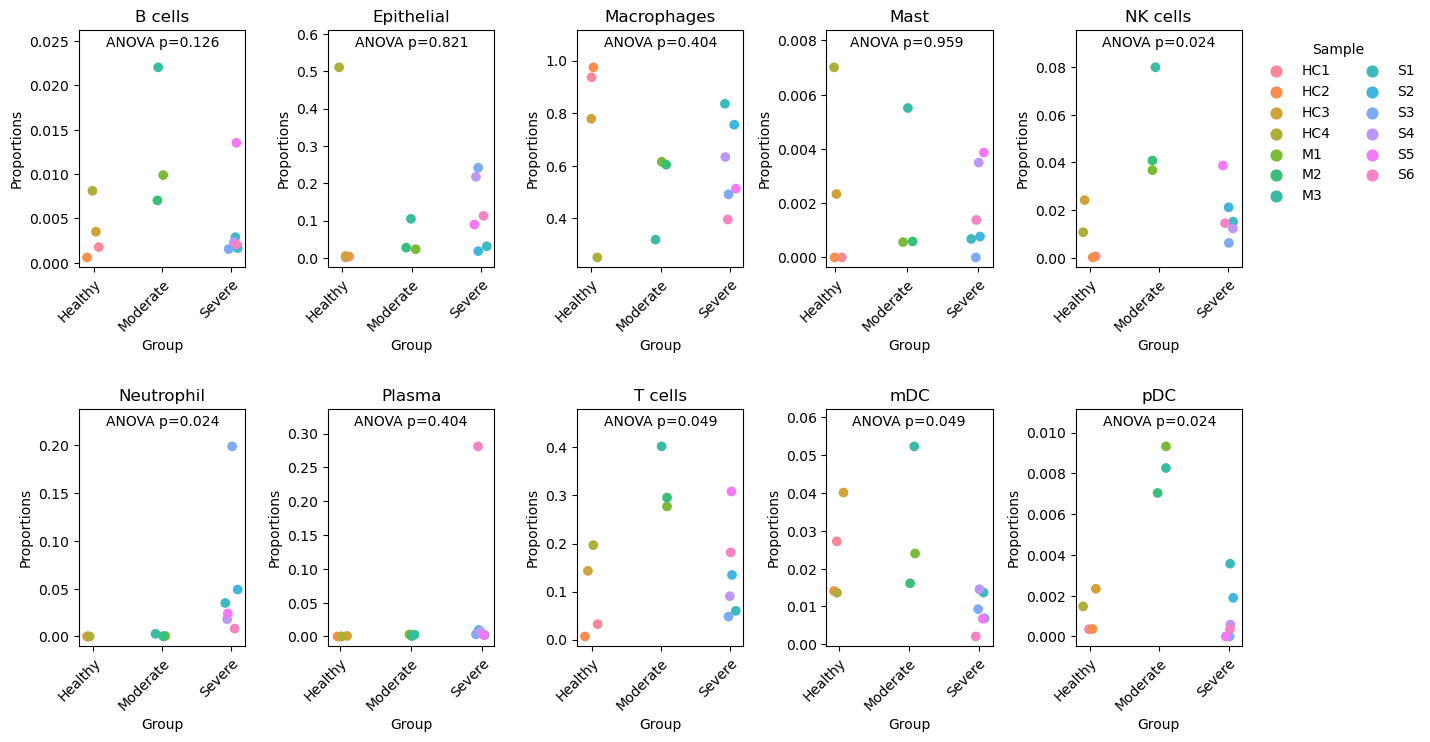

In [9]:
out_covid_arcsin.plot(n_columns=5, save=f"{FIG_PATH}/covid_stripplot_arcsin.pdf")

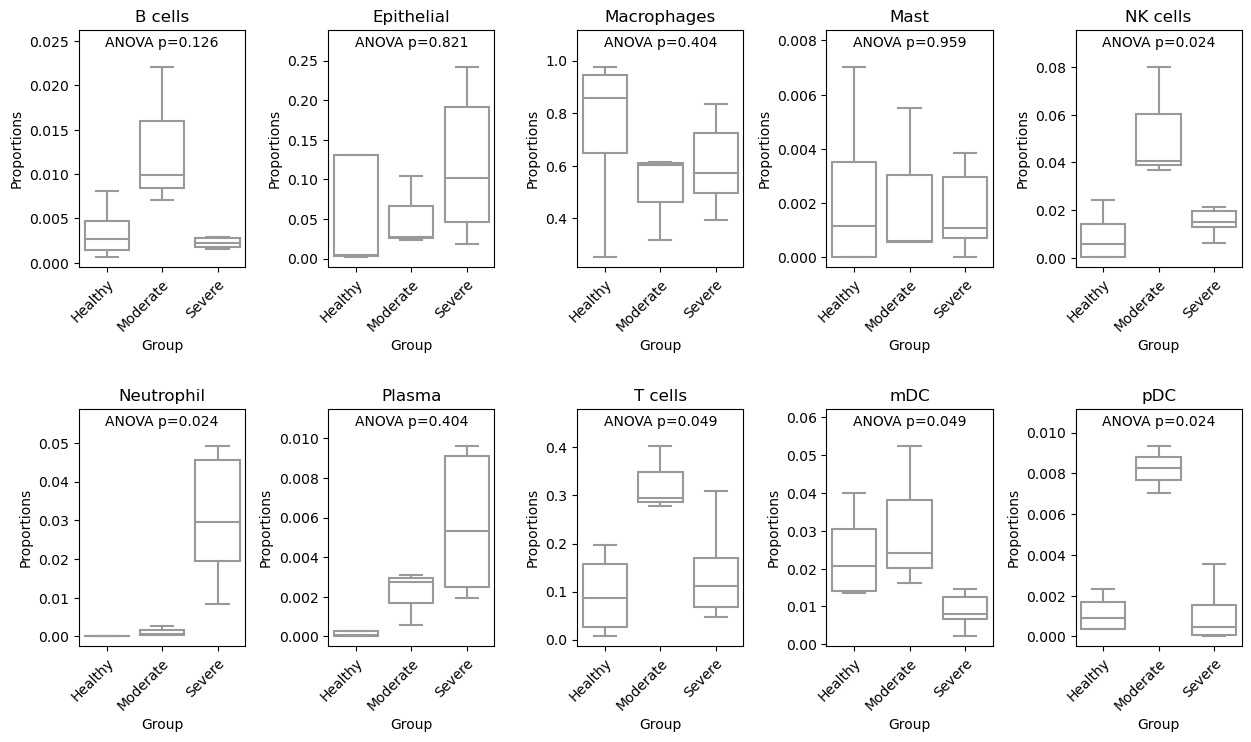

In [10]:
out_covid_arcsin.plot(kind='boxplot', n_columns=5, save=f"{FIG_PATH}/covid_boxplot_arcsin.pdf")

----------

## Without replicates

### Logit

In [11]:
out_covid_boot_logit = scanpro(covid, clusters_col='celltype',
                               conds_col='Group', n_reps=8)

out_covid_boot_logit.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 12.68 seconds


baseline_props  mean_props_Healthy  mean_props_Moderate  \
clusters                                                               
B cells            0.003343            0.001372             0.007502   
Epithelial         0.053652            0.061720             0.026265   
Macrophages        0.750870            0.850207             0.599225   
Mast               0.001064            0.000523             0.000415   
NK cells           0.016425            0.003145             0.036964   
Neutrophil         0.024418            0.000000             0.000249   
Plasma             0.015818            0.000034             0.001086   
T cells            0.117241            0.051069             0.285230   
mDC                0.014860            0.019081             0.019148   
pDC                0.002310            0.000363             0.005934   

             mean_props_Severe  p_values  
clusters                                  
B cells               0.001958  0.159756  
Epithelial            0.045819  0.319534  
Macrophages           0.727359  0.032608  
Mast                  0.000592  0.489110  
NK cells              0.015301  0.013150  
Neutrophil            0.038975  0.000005  
Plasma                0.023123  0.000183  
T cells               0.118617  0.008558  
mDC                   0.007420  0.298066  
pDC                   0.001245  0.046769

In [12]:
out_covid_boot_logit.results.to_csv("results/covid_scanpro_norep_logit.tsv", sep="\t")

### Arcsin

In [13]:
out_covid_boot_arcsin = scanpro(covid, clusters_col='celltype',
                                conds_col='Group', n_reps=8, transform='arcsin')

out_covid_boot_arcsin.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 13.19 seconds


baseline_props  mean_props_Healthy  mean_props_Moderate  \
clusters                                                               
B cells            0.003343            0.001400             0.007493   
Epithelial         0.053652            0.061655             0.026211   
Macrophages        0.750870            0.850725             0.598391   
Mast               0.001064            0.000519             0.000413   
NK cells           0.016425            0.003127             0.036653   
Neutrophil         0.024418            0.000000             0.000249   
Plasma             0.015818            0.000035             0.001070   
T cells            0.117241            0.051025             0.286811   
mDC                0.014860            0.019017             0.019148   
pDC                0.002310            0.000363             0.005911   

             mean_props_Severe  p_values  
clusters                                  
B cells               0.001976  0.125247  
Epithelial            0.045517  0.151630  
Macrophages           0.726995  0.001332  
Mast                  0.000593  0.658442  
NK cells              0.015235  0.005646  
Neutrophil            0.038993  0.000018  
Plasma                0.023040  0.000255  
T cells               0.118593  0.000141  
mDC                   0.007329  0.203773  
pDC                   0.001208  0.050342

In [14]:
out_covid_boot_arcsin.results.to_csv("results/covid_scanpro_norep_arcsin.tsv", sep="\t")

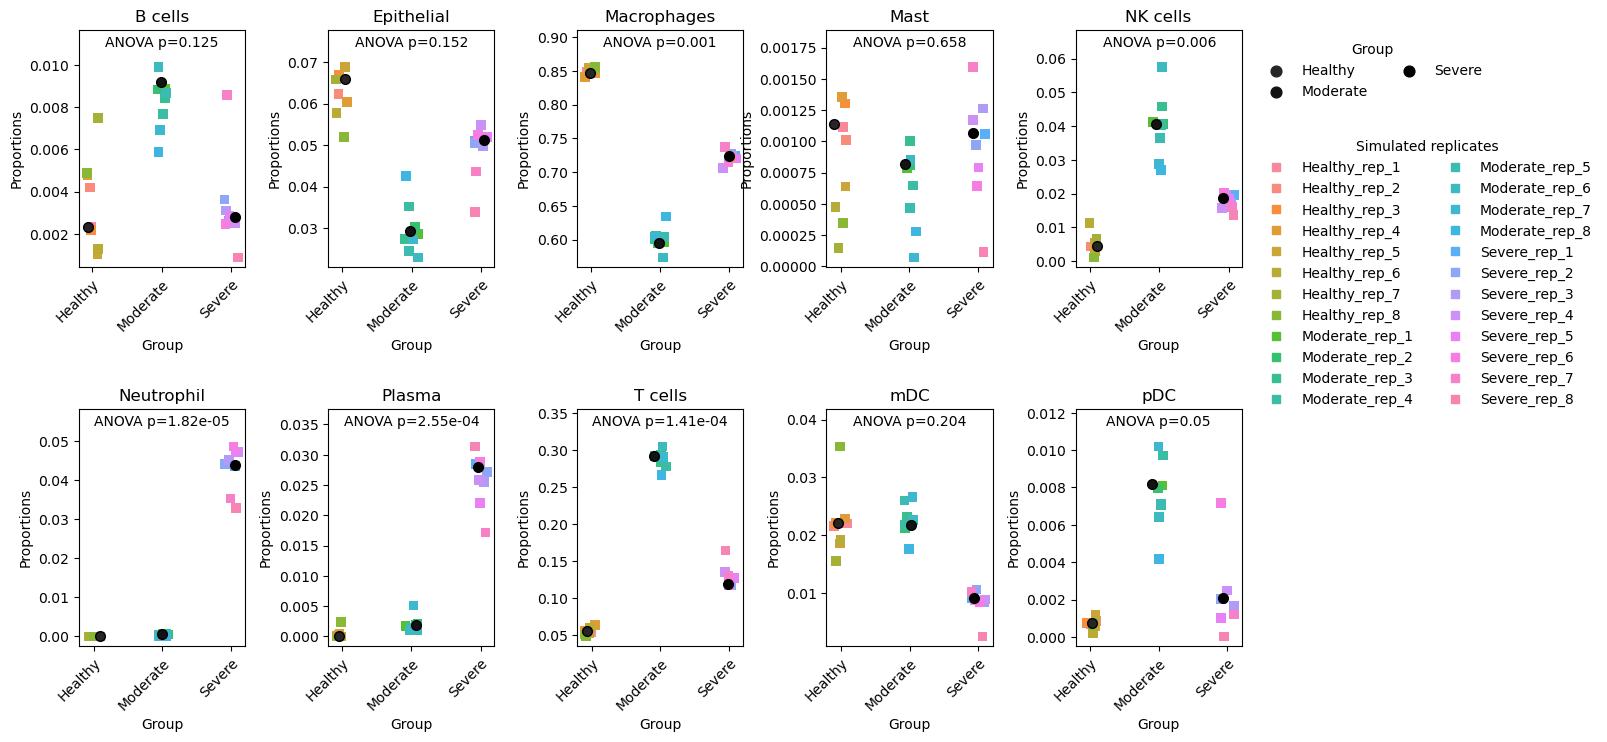

In [15]:
out_covid_boot_arcsin.plot(n_columns=5, save=f"{FIG_PATH}/covid_stripplot_norep_arcsin.pdf")

#### Plasma cells have one sample as outlier, which affects the bootstrapping result

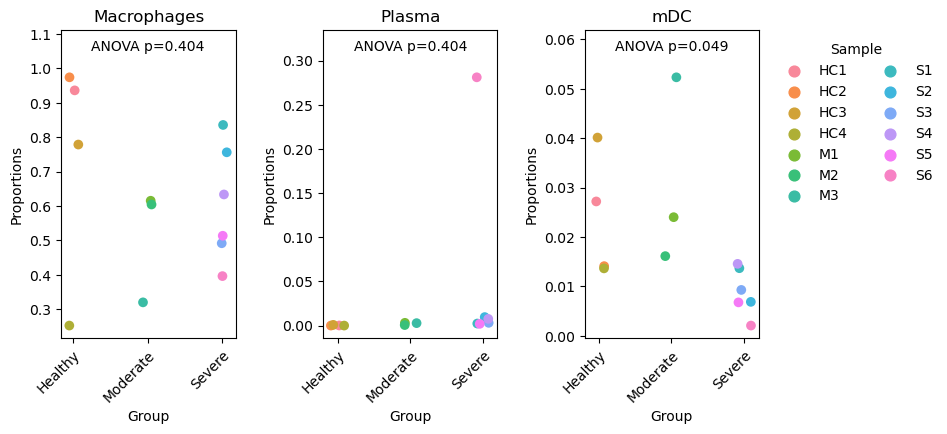

In [16]:
out_covid_arcsin.plot(n_columns=5, clusters=['Macrophages', 'Plasma', 'mDC'],
                      save=f'{FIG_PATH}/covid_stripplot_example.pdf')

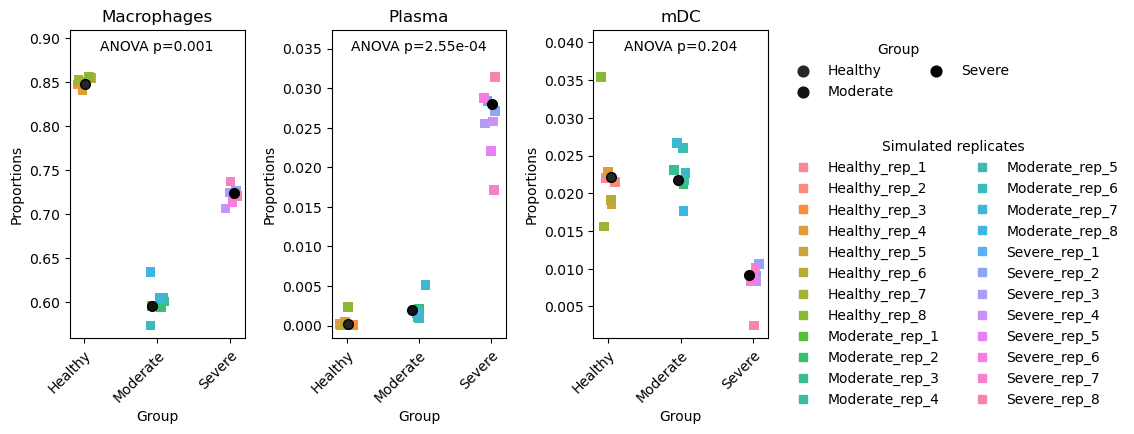

In [17]:
out_covid_boot_arcsin.plot(clusters=['Macrophages', 'Plasma', 'mDC'],
                           save=f'{FIG_PATH}/covid_stripplot_norep_example.pdf')

-----------------

# Run propeller

In [18]:
# Setup path to R
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [19]:
%%R -i covid -o propeller_results_logit -o propeller_results_arcsin
library(speckle)

propeller_results_logit = propeller(clusters = covid$celltype, sample = covid$Sample, group = covid$Group, 
                                    transform = "logit")

propeller_results_arcsin = propeller(clusters = covid$celltype, sample = covid$Sample, group = covid$Group, 
                                    transform = "asin")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Performing logit transformation of proportions
group variable has > 2 levels, ANOVA will be performed
Performing arcsin square root transformation of proportions
group variable has > 2 levels, ANOVA will be performed


In [20]:
propeller_results_logit

BaselineProp  PropMean.Healthy  PropMean.Moderate  \
Neutrophil       0.024418         -0.000000           0.001204   
Plasma           0.015818          0.000224           0.002150   
pDC              0.002310          0.001134           0.008210   
NK cells         0.016425          0.008894           0.052466   
T cells          0.117241          0.094594           0.325030   
mDC              0.014860          0.023776           0.030831   
B cells          0.003343          0.003503           0.012990   
Epithelial       0.053652          0.130246           0.051903   
Macrophages      0.750870          0.735290           0.512996   
Mast             0.001064          0.002337           0.002220   

             PropMean.Severe  Fstatistic       P.Value       FDR  
Neutrophil          0.055594   34.534717  3.546468e-07  0.000004  
Plasma              0.050913    8.718137  2.056673e-03  0.010283  
pDC                 0.001066    5.785273  1.052218e-02  0.034935  
NK cells            0.017979    5.391241  1.397389e-02  0.034935  
T cells             0.137097    3.155124  6.468749e-02  0.129375  
mDC                 0.008876    2.484229  1.090338e-01  0.167374  
B cells             0.004005    2.394586  1.171617e-01  0.167374  
Epithelial          0.118455    1.813467  1.901866e-01  0.237733  
Macrophages         0.604316    1.620740  2.239111e-01  0.248790  
Mast                0.001699    0.692073  5.127128e-01  0.512713

In [21]:
propeller_results_arcsin

BaselineProp  PropMean.Healthy  PropMean.Moderate  \
pDC              0.002310          0.001134           0.008210   
Neutrophil       0.024418         -0.000000           0.001204   
NK cells         0.016425          0.008894           0.052466   
T cells          0.117241          0.094594           0.325030   
mDC              0.014860          0.023776           0.030831   
B cells          0.003343          0.003503           0.012990   
Plasma           0.015818          0.000224           0.002150   
Macrophages      0.750870          0.735290           0.512996   
Epithelial       0.053652          0.130246           0.051903   
Mast             0.001064          0.002337           0.002220   

             PropMean.Severe  Fstatistic   P.Value       FDR  
pDC                 0.001066    7.668004  0.007892  0.028010  
Neutrophil          0.055594    7.699773  0.008007  0.028010  
NK cells            0.017979    7.520691  0.008403  0.028010  
T cells             0.137097    5.377659  0.023311  0.054665  
mDC                 0.008876    5.037225  0.027333  0.054665  
B cells             0.004005    3.180201  0.080297  0.133829  
Plasma              0.050913    1.379356  0.291777  0.415445  
Macrophages         0.604316    1.218630  0.332356  0.415445  
Epithelial          0.118455    0.305296  0.742907  0.825452  
Mast                0.001699    0.046515  0.954732  0.954732

In [22]:
propeller_results_logit.to_csv("results/covid_propeller_rep_logit.tsv", sep="\t")
propeller_results_arcsin.to_csv("results/covid_propeller_rep_arcsin.tsv", sep="\t")

-----------------

# Run scCODA

In [23]:
import pertpy as pt
import anndata as ad

In [24]:
sccoda_adata = ad.AnnData(obs=covid)

## With replicates

In [25]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="celltype", 
                                sample_identifier="Sample", covariate_obs=["Group"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Group", reference_cell_type="Mast")

Zero counts encountered in data! Added a pseudocount of 0.5.

In [26]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [01:23<00:00, 132.00it/s, 127 steps of size 2.71e-02. acc. prob=0.77]


In [27]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 13 samples, 10 cell types                                    │
│ Reference cell type                        │ Mast                                                               │
│ Formula                                    │ Group                                                              │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│              Final Parameter  Expected Sample                                                                   │
│ Cell Type                                                                                                       │
│ B cells          -1.108           121.883                                                                       │
│ Epithelial       -0.232           292.675                                                                       │
│ Macrophages       2.202          3337.784                                                                       │
│ Mast             -1.468            85.035                                                                       │
│ NK cells         -0.812           163.868                                                                       │
│ Neutrophil       -1.484            83.685                                                                       │
│ Plasma           -1.424            88.860                                                                       │
│ T cells           0.460           584.679                                                                       │
│ mDC              -0.545           214.018                                                                       │
│ pDC              -1.406            90.474                                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample  log2-fold change                                 │
│ Covariate       Cell Type                                                                                       │
│ GroupT.Moderate B cells          0.000             95.029           -0.359                                      │
│                 Epithelial       0.000            228.190           -0.359                                      │
│                 Macrophages      0.000           2602.369           -0.359                                      │
│                 Mast             0.000             66.299           -0.359                                      │
│                 NK cells         0.000            127.763           -0.359                                      │
│                 Neutrophil       0.000             65.247           -0.359                                      │
│                 Plasma           0.000             69.281           -0.359                                      │
│                 T cells          1.238           1571.380            1.426                                      │
│                 mDC              0.000            166.864           -0.359                                      │
│                 pDC              0.000             70.540           -0.359                                      │
│ GroupT.Severe   B cells          0.000            121.883            0.000                                      │
│                 Epithelial       0.000            292.675            0.000                                      │
│                 Macrophages      0.000           3337.784            0.000                                      │
│                 Mast             0.000             85.035            0.000                                      │
│                 NK cells         0.000            163.868            0.000                                      │
│                 Neutrophil       0.000             83.685            0.000                                      │
│                 Plasma           0.000             88.860            0.000                                      │
│                 T cells          0.000            584.679            0.000                                      │
│                 mDC              0.000            214.018            0.000                                      │
│                 pDC              0.000             90.474            0.000                                      │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [28]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate         Cell Type                         
Group[T.Moderate] B cells                False  0.01
                  Epithelial             False  0.01
                  Macrophages            False  0.01
                  Mast                   False  0.01
                  NK cells               False  0.01
...                                        ...   ...
Group[T.Severe]   Neutrophil              True  0.40
                  Plasma                  True  0.40
                  T cells                 True  0.40
                  mDC                     True  0.40
                  pDC                    False  0.40

[120 rows x 2 columns]

In [29]:
credible_effects.to_csv("results/covid_sccoda_rep.tsv", sep="\t")

## Without replicates

In [30]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="celltype", 
                                sample_identifier="Group", covariate_obs=["Group"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Group", reference_cell_type="Mast")

Zero counts encountered in data! Added a pseudocount of 0.5.

In [31]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [00:38<00:00, 288.55it/s, 255 steps of size 2.27e-02. acc. prob=0.66]


In [32]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 3 samples, 10 cell types                                    │
│ Reference cell type                         │ Mast                                                              │
│ Formula                                     │ Group                                                             │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│              Final Parameter  Expected Sample                                                                   │
│ Cell Type                                                                                                       │
│ B cells          -0.219           119.512                                                                       │
│ Epithelial        2.073          1182.539                                                                       │
│ Macrophages       4.796         18005.252                                                                       │
│ Mast             -0.812            66.050                                                                       │
│ NK cells          0.592           268.921                                                                       │
│ Neutrophil       -1.109            49.078                                                                       │
│ Plasma           -0.801            66.781                                                                       │
│ T cells           2.425          1681.462                                                                       │
│ mDC               1.020           412.575                                                                       │
│ pDC              -0.552            85.663                                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample  log2-fold change                                 │
│ Covariate       Cell Type                                                                                       │
│ GroupT.Moderate B cells          0.000            119.512           0.000                                       │
│                 Epithelial       0.000           1182.539           0.000                                       │
│                 Macrophages      0.000          18005.252           0.000                                       │
│                 Mast             0.000             66.050           0.000                                       │
│                 NK cells         0.000            268.921           0.000                                       │
│                 Neutrophil       0.000             49.078           0.000                                       │
│                 Plasma           0.000             66.781           0.000                                       │
│                 T cells          0.000           1681.462           0.000                                       │
│                 mDC              0.000            412.575           0.000                                       │
│                 pDC              0.000             85.663           0.000                                       │
│ GroupT.Severe   B cells          0.000            119.512           0.000                                       │
│                 Epithelial       0.000           1182.539           0.000                                       │
│                 Macrophages      0.000          18005.252           0.000                                       │
│                 Mast             0.000             66.050           0.000                                       │
│                 NK cells         0.000            268.921           0.000                                       │
│                 Neutrophil       0.000             49.078           0.000                                       │
│                 Plasma           0.000             66.781           0.000                                       │
│                 T cells          0.000           1681.462           0.000                                       │
│                 mDC              0.000            412.575           0.000                                       │
│                 pDC              0.000             85.663           0.000                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [33]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate         Cell Type                         
Group[T.Moderate] B cells                False  0.01
                  Epithelial             False  0.01
                  Macrophages            False  0.01
                  Mast                   False  0.01
                  NK cells               False  0.01
...                                        ...   ...
Group[T.Severe]   Neutrophil              True  0.40
                  Plasma                  True  0.40
                  T cells                 True  0.40
                  mDC                     True  0.40
                  pDC                    False  0.40

[120 rows x 2 columns]

In [34]:
credible_effects.to_csv("results/covid_sccoda_norep.tsv", sep="\t")

## t-test

In [35]:
from scipy import stats
from scanpro.get_transformed_props import get_transformed_props

In [36]:
counts, props, _ = get_transformed_props(covid, cluster_col='celltype', 
                                          sample_col='Sample')
y = props.values
n_total = np.sum(y, axis=1)  # sum per sample

# Get dimensions of data
N = y.shape[0]

p_val = []
N, K = y.shape

n_group = int(N/2)

if y.shape[0] == 2:
    p_val = [0 for _ in range(K)]
else:
    for k in range(K):

        test = stats.ttest_ind(y[0:n_group, k], y[n_group:, k])
        p_val.append(test[1])

ttest_res = pd.DataFrame(p_val, index=counts.columns, columns=['p_value'])
ttest_res

p_value
celltype             
B cells      0.699239
Epithelial   0.805857
Macrophages  0.325534
Mast         0.716327
NK cells     0.534387
Neutrophil   0.116134
Plasma       0.335400
T cells      0.822347
mDC          0.369231
pDC          0.475997

In [37]:
#ttest_res.to_csv("results/heart_ttest_rep.tsv", sep="\t")